In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'


In [16]:
import yfinance as yf
prices_ur = yf.download('USDRUB=X','2019-01-01','2020-10-02')

[*********************100%***********************]  1 of 1 completed


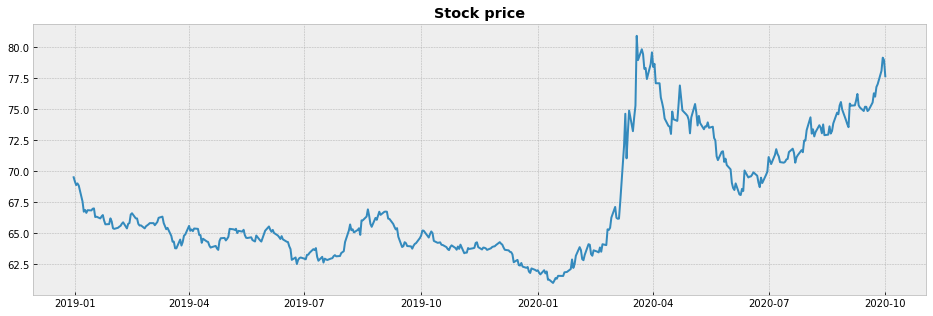

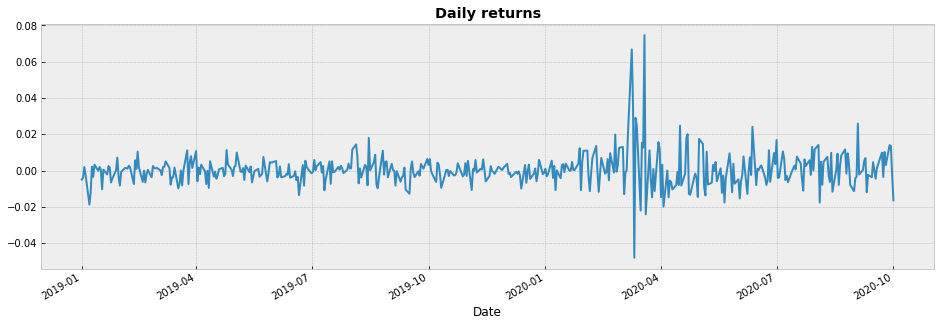

In [17]:
plot_fields =  ['Adj Close']
fig = plt.figure(figsize=(16, 5))
plt.plot(prices_ur[plot_fields])
plt.title("Stock price", weight="bold")
plt.show()

ret_ur = prices_ur['Adj Close'].pct_change()
fig_1 = plt.figure(figsize=(16, 5))
ret_ur.plot()
plt.title("Daily returns", weight="bold")
plt.show()

# 1. Инвестиционная облигация Б-1-116 «USDRUB»
<hr>

### Определить какое количество средств необходимо положить на fixed income часть:

In [18]:
zero_coupon_rate_vtb = 4.12 / 100
tenor = 0.5
price = 1.00001 / ((1 + zero_coupon_rate_vtb) ** tenor)
price

0.9800252453195765

### Определить дисконт облигации - количество средств, которые можно потратить на покупку опциональности:

In [19]:
discount = 1 - price
discount

0.019974754680423534

### Определить тип payoff:

In [20]:
x = np.linspace(80, 120, 121)

def f1(x):
    return np.where(x >= 80, 2, -20)

def f2(x):
    return np.where(x <= 95, 10, np.where((x >= 95) & (x < 95), x, -1.4))

def f3(x):
    return np.where(x <= 95, 12, np.where((x >= 95) & (x < 95), x, 0))

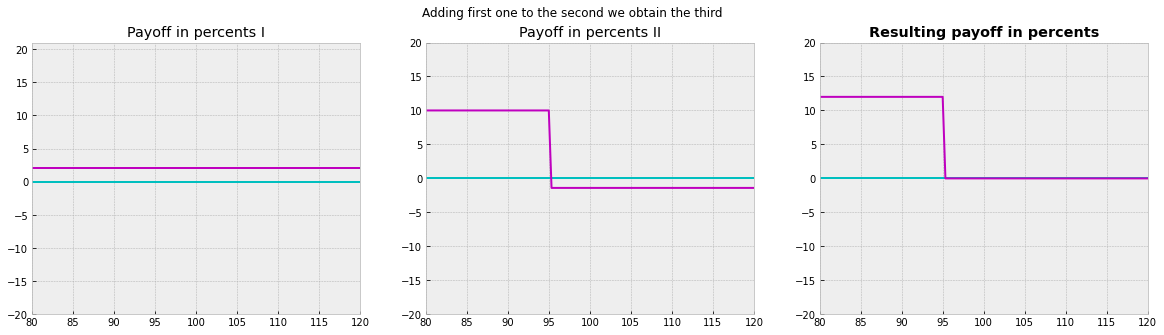

In [21]:
import pylab

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Adding first one to the second we obtain the third')
plt.rcParams['figure.figsize'] = (20, 5)
ax1.set_xlim(80, 120)
ax1.set_ylim(-20, 21)
ax1.plot(x * 0, c='c')
ax1.plot(x, f1(x), c='m')
ax1.set_title("Payoff in percents I")

ax2.set_xlim(80, 120)
ax2.set_ylim(-20, 20)
ax2.plot(x * 0, c='c')
ax2.plot(x, f2(x), c='m')
ax2.set_title("Payoff in percents II")

ax3.set_xlim(80, 120)
ax3.set_ylim(-20, 20)
ax3.plot(x * 0, c='c')
ax3.plot(x, f3(x), c='m')
ax3.set_title("Resulting payoff in percents", weight="bold")

plt.show()

### Посчитать стоимость опциона  из описания доп. дохода в питч ВТБ для 100% номинала:

In [22]:
def count_pit_vtb(s, k, r, q, sigma, dt):
    d2 = (1 / (sigma * np.sqrt(dt))) * (np.log(s / k) + (r - q - (sigma ** 2) * 0.5) * dt)
    return np.exp (-r * dt) * norm.cdf(- d2)

pit_vtb = count_pit_vtb(1, 0.95, zero_coupon_rate_vtb, 0.0009, 0.169575, 0.5)
pit_vtb

0.28998997536117377

### Определить на какой номинал необходимо купить опцион, чтобы обеспечить заявленную потенциальную доходность:

In [23]:
safe = round(1.1 ** (0.5) - 1, 2)
safe

0.05

### Определить итоговую стоимость опциона в % от номинала облигации :

In [24]:
final = round(safe * pit_vtb, 3)
final

0.014

# 2. Запрайсить структурный продукт 3y Reverse Convertible
<hr>

### Посмотреть доходность с кривой доходности ОФЗ на 3-х летний срок:

<img src='https://media-prod.storage.yandexcloud.net/media/user_files/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA_%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0_2020-10-09_%D0%B2_19.52.42.png' width=70%>

### Посчитать премию за проданный опцион:

In [25]:
zero_coupon_rate = 4.98 / 100

def count_opt_price(s, k, r, q, sigma, dt):
    d1 = (1 / (sigma * np.sqrt(dt))) * (np.log(s / k) + (r - q + (sigma ** 2) * 0.5) * dt)
    d2 = (1 / (sigma * np.sqrt(dt))) * (np.log(s / k) + (r - q - (sigma ** 2) * 0.5) * dt)
    nd1 = norm.cdf(-d1)
    nd2 = norm.cdf(-d2)
    f = s * np.exp((r - q) * dt)
    return round(np.exp(-r * dt) * (k * nd2 - f * nd1), 4)

opt_price = count_opt_price(1, 0.7, zero_coupon_rate, 0, 0.3, 3)
opt_price

0.0346

### Перевести премию из % от номинала в % годовых:

In [26]:
annual_inc = round(1.0346 ** (1 / 3) - 1, 4)
annual_inc

0.0114

### Указать какой получается итоговая доходность по облигации с учетом проданного пута:

In [1]:
total = round(((1 + opt_price) * (1 + 0.0498) ** 3) ** (1 / 3) - 1, 4)
total*100

NameError: name 'opt_price' is not defined